In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

#setting decimal point for floating numbers
pd.set_option('display.float_format', lambda x: '%.4f' % x)


In [2]:
#import the dataset
pay = pd.read_csv("//Users//kingsley//Documents//Hackathon//payments.csv")

pay['PAY_DATE'] = pay['PAY_DATE'].astype('datetime64[ns]')

pay['PAY'] = [p.replace(',','.') for p in pay['PAY']]
pay['PAY'] = pay['PAY'].astype('float64')
pay['PAY'] = ['{:.4f}'.format(pa) for pa in pay['PAY']]
pay['PAY'] = pay['PAY'].astype('float64')

pay

,PAY,CNT,PAY_DATE
0,31.5778,25,2012-01-01
1,108.1086,133,2012-02-01
2,53.8621,51,2012-03-01
3,143.8577,106,2012-04-01
4,172.5295,165,2012-05-01
...,...,...,...
3738,40525.8354,31691,2022-03-27
3739,58266.6178,44599,2022-03-28
3740,50635.1406,36738,2022-03-29
3741,41309.8073,31901,2022-03-30


In [3]:
pay

,PAY,CNT,PAY_DATE
0,31.5778,25,2012-01-01
1,108.1086,133,2012-02-01
2,53.8621,51,2012-03-01
3,143.8577,106,2012-04-01
4,172.5295,165,2012-05-01
...,...,...,...
3738,40525.8354,31691,2022-03-27
3739,58266.6178,44599,2022-03-28
3740,50635.1406,36738,2022-03-29
3741,41309.8073,31901,2022-03-30


In [4]:
pay['day'] = [date.strftime('%d') for date in pay['PAY_DATE']]

#calling out day number

pay

,PAY,CNT,PAY_DATE,day
0,31.5778,25,2012-01-01,01
1,108.1086,133,2012-02-01,01
2,53.8621,51,2012-03-01,01
3,143.8577,106,2012-04-01,01
4,172.5295,165,2012-05-01,01
...,...,...,...,...
3738,40525.8354,31691,2022-03-27,27
3739,58266.6178,44599,2022-03-28,28
3740,50635.1406,36738,2022-03-29,29
3741,41309.8073,31901,2022-03-30,30


In [5]:
day_agg_pay = pay.groupby(['day']).agg(total_payment = ('PAY', 'sum'), total_customer = ('CNT', 'sum')).reset_index()

day_agg_pay['day_num'] = [str(day).split('-')[0] for day in day_agg_pay['day']]

day_agg_pay.sort_values('day_num', ascending = True)

day_agg_pay

#aggregating

,day,total_payment,total_customer,day_num
0,01,2177633.5671,1864073,01
1,02,4155943.9598,3324256,02
2,03,4146358.1199,3468226,03
3,04,3353871.9691,2880492,04
4,05,2678240.3574,2407566,05
5,06,3120966.8302,2772367,06
6,07,3348171.7099,3105966,07
7,08,3029696.6273,2933703,08
8,09,3133442.7089,2940779,09
9,10,3440776.8431,3108479,10


# Forecasting for a particular month

In [6]:
## but first filter the table to only relevant features 

daily = pay[['PAY', 'CNT', 'day','PAY_DATE']]
daily

,PAY,CNT,day,PAY_DATE
0,31.5778,25,01,2012-01-01
1,108.1086,133,01,2012-02-01
2,53.8621,51,01,2012-03-01
3,143.8577,106,01,2012-04-01
4,172.5295,165,01,2012-05-01
...,...,...,...,...
3738,40525.8354,31691,27,2022-03-27
3739,58266.6178,44599,28,2022-03-28
3740,50635.1406,36738,29,2022-03-29
3741,41309.8073,31901,30,2022-03-30


In [7]:
day_01 = daily[daily['day']== '01']
day_01

,PAY,CNT,day,PAY_DATE
0,31.5778,25,01,2012-01-01
1,108.1086,133,01,2012-02-01
2,53.8621,51,01,2012-03-01
3,143.8577,106,01,2012-04-01
4,172.5295,165,01,2012-05-01
...,...,...,...,...
3660,31211.5932,25390,01,2022-08-01
3661,31366.1737,24802,01,2022-09-01
3662,65056.2896,49744,01,2022-10-01
3663,59686.7769,46600,01,2022-11-01


,PAY,CNT,day,PAY_DATE
0,31.5778,25,01,2012-01-01
1,108.1086,133,01,2012-02-01
2,53.8621,51,01,2012-03-01
3,143.8577,106,01,2012-04-01
4,172.5295,165,01,2012-05-01
...,...,...,...,...
3660,31211.5932,25390,01,2022-08-01
3661,31366.1737,24802,01,2022-09-01
3662,65056.2896,49744,01,2022-10-01
3663,59686.7769,46600,01,2022-11-01


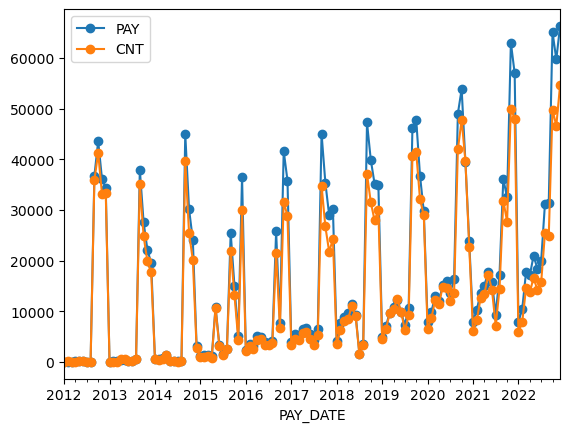

In [8]:
#visualizing the trend of total payments and total customers across all Januaries
day_01.plot.line(x= 'PAY_DATE', y = ['PAY', 'CNT'], marker='o', label=['PAY', 'CNT']) 

#plt.savefig('january_trend.png') # save plot figure as png to current path

day_01

In [9]:
# splitting our dataframe to features (x) and output(y)
x = day_01[['PAY', 'CNT',]].iloc[:, 0].values
y = day_01[['PAY', 'CNT',]].iloc[:, -1].values

# reshape the matrix to 1-dimension so that we can transform using stanadardscaler
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [10]:
# creating the standard scaler object to transform our x and y varibales
sc = StandardScaler()
x_trans = sc.fit_transform(x)
y_trans = sc.fit_transform(y)

In [11]:
#importing the train and test split model to be used in creating our train and test set from the transformed data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size = 0.3)

In [12]:
from sklearn.linear_model import LinearRegression

# building our linear model using the train set
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
# visualizing our model coefficient and intercept
print(f'''Linear model btw PAY & CNT for January:  
Y = {'{:.4f}'.format(lr.coef_[0][0])}x + {'{:.8f}'.format(lr.intercept_[0])}''')

Linear model btw PAY & CNT for January:  
Y = 0.9897x + -0.00966790


In [14]:
# using our linear to predict from our test set
y_pred = lr.predict(x_test)
y_pred

array([[-0.95684828],
       [-0.78608841],
       [ 2.3472253 ],
       [ 1.13784985],
       [-0.96324361],
       [ 1.65372341],
       [ 1.3241686 ],
       [-0.17940269],
       [-0.94173967],
       [-0.01816194],
       [-0.96455381],
       [ 2.8913131 ],
       [-0.93899491],
       [-0.33767263],
       [-0.64289229],
       [-0.42552535],
       [-0.20998344],
       [ 2.81954931],
       [-0.40317461],
       [ 1.71861028],
       [-0.96189509],
       [-0.89142186],
       [-0.94459403],
       [-0.95883981],
       [-0.74147985],
       [-0.30536818],
       [ 0.51337147],
       [-0.78767717],
       [-0.76004201],
       [-0.09487868],
       [ 0.63449348],
       [-0.58923656],
       [-0.67390028],
       [-0.54454741],
       [-0.42563809],
       [-0.68407598],
       [ 1.56754231],
       [-0.67995678],
       [ 0.76025508],
       [-0.81600728]])

In [15]:
# testing our  model accuracy
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

MAPE = mean_absolute_percentage_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Mean absolute percentage error: ','{:.4f}'.format(MAPE))
print('Mean squared error: ', '{:.4f}'.format(MSE))

Mean absolute percentage error:  0.1421
Mean squared error:  0.0168


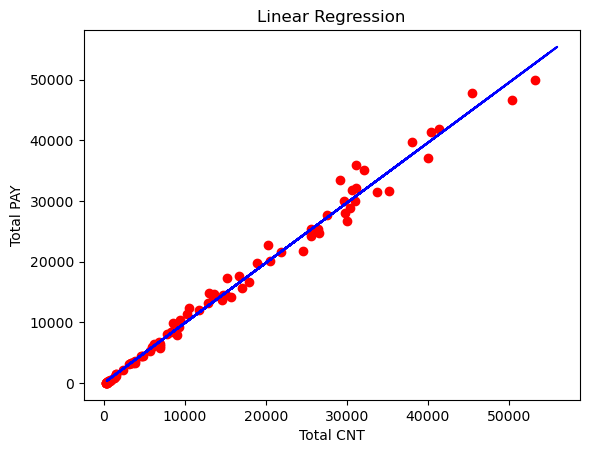

,test_CNT,test_total_PAY,pred_total_PAY
0,463.7671,298.0000,466.9494
1,2926.0626,2623.0000,2903.7982
2,48107.3117,47999.0000,47618.1194
3,30668.5557,33181.0000,30359.5851
4,371.5488,101.0000,375.6842
5,38107.2656,34807.0000,37721.4193
6,33355.2046,39554.0000,33018.4687
7,11674.2511,12606.0000,11561.5780
8,681.6278,606.0000,682.5586
9,13999.2843,13591.0000,13862.5831


In [16]:
#inverting our variables back to the original form to properly visualize their relationship
xtr_inv = sc.inverse_transform(x_train)
ytr_inv = sc.inverse_transform(y_train)

xt_inv = sc.inverse_transform(x_test)
yt_inv = sc.inverse_transform(y_test)

ypr_inv = sc.inverse_transform(y_pred)

inv_df = pd.concat([pd.DataFrame(xt_inv).rename(columns = {0: 'test_CNT'}),
                   pd.DataFrame(yt_inv).rename(columns = {0: 'test_total_PAY'}),
                   pd.DataFrame(ypr_inv).rename(columns = {0: 'pred_total_PAY'})], axis = 1)


plt.scatter(xtr_inv, ytr_inv, color = 'red')
plt.plot(xt_inv, ypr_inv, color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Total CNT')
plt.ylabel('Total PAY')
plt.show()

#plt.savefig('days_trend.png') # save plot figure as png to current path

inv_df